In [23]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns  
import scipy.stats as stats

In [24]:
# Loading Train and Test Data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

X_train = train_data.drop(['id','yield','Row#'], axis=1)  # Assuming 'yield' is the target column
Y_train = train_data['yield']

X_test = test_data.drop(['id', 'Row#'], axis=1)
X_update = train_data.drop(['id','yield','Row#','MaxOfUpperTRange','AverageOfUpperTRange','MaxOfLowerTRange','AverageOfLowerTRange','RainingDays','fruitmass','seeds'], axis=1)

In [25]:
def OLS(X, Y):
    '''
    Estimate B(parameter) by OLS method
    '''
    X = np.column_stack((np.ones(X.shape[0]), X))  # Add a column of ones for the intercept term
    X_T_X_inv = np.linalg.inv(X.T.dot(X))
    beta = X_T_X_inv.dot(X.T).dot(Y)
    return beta

In [26]:
def predict(X, beta):
    '''
    Predict Y
    '''
    X = np.column_stack((np.ones(X.shape[0]), X))  # Add intercept term
    return X.dot(beta)

In [27]:
def MAE(y_true, y_pred):
    '''
    Calculate MAE
    '''
    return np.mean(np.abs(y_true - y_pred))

In [28]:
# Estimate Parameters
beta = OLS(X_train.values, Y_train.values)
train_predictions = predict(X_train.values, beta)
mae_train = MAE(Y_train.values, train_predictions)
print(f"Train MAE: {mae_train}")

Train MAE: 269.59383443738795


In [29]:
# Predict Test Data
test_predictions = predict(X_test.values, beta)
test_id = test_data['id'].values

# Save test predictions to CSV
test_output = pd.DataFrame({'id': test_id, 'yields': test_predictions.flatten()})
test_output.to_csv('test_predictions.csv', index=False)

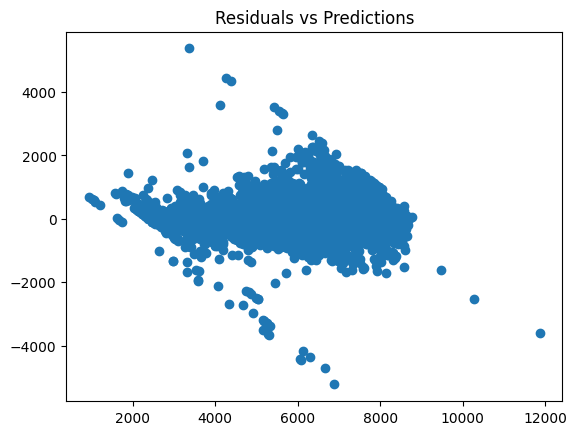

In [30]:
# Plotting Residuals vs Predictions
residuals = Y_train.values - train_predictions
plt.scatter(train_predictions, residuals)
plt.title("Residuals vs Predictions")
plt.show()

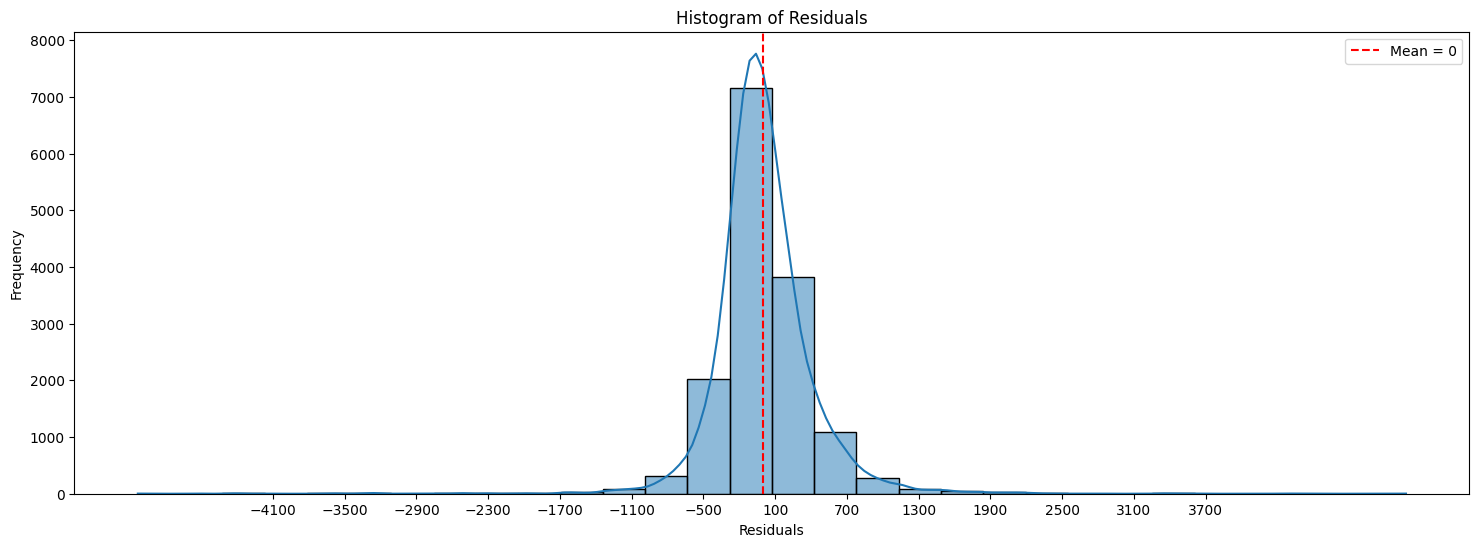

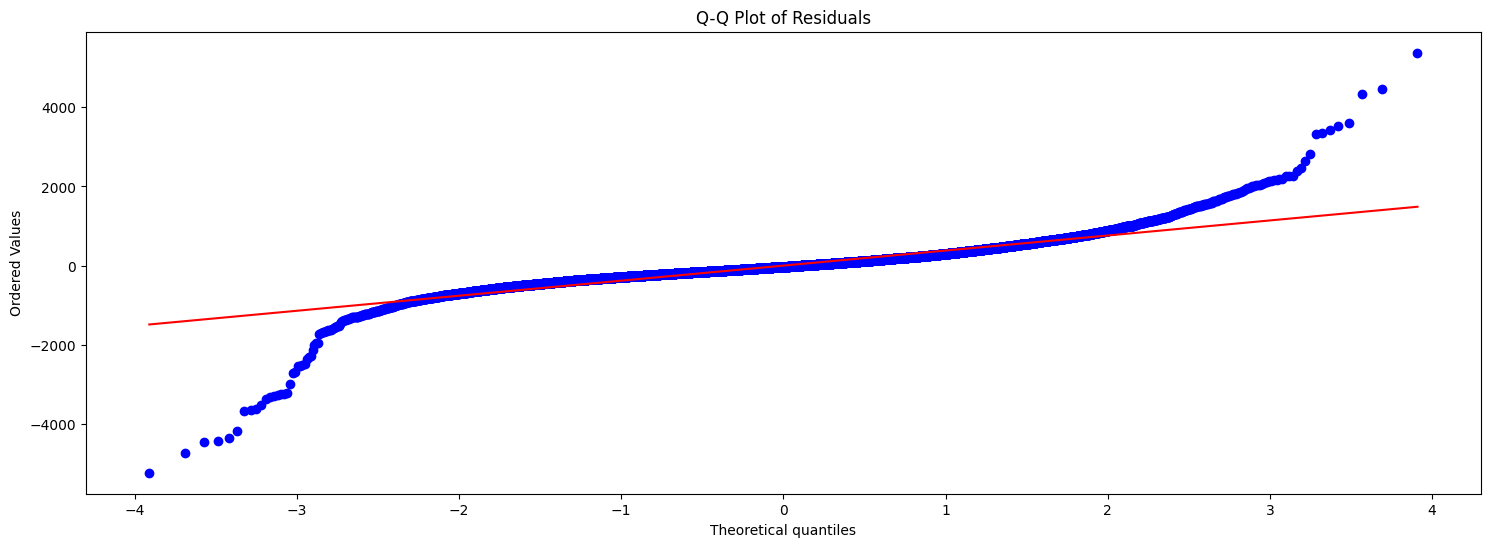

In [31]:
# Histogram (Distribution of Residuals; To check Normal Distribution of Residuals)
plt.figure(figsize=(18, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.xticks(range(-4100,4300,600))
plt.axvline(x=0, color='red', linestyle='--', label='Mean = 0')
plt.legend()
plt.show()

# Q-Q Plot
plt.figure(figsize=(18, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


<Axes: >

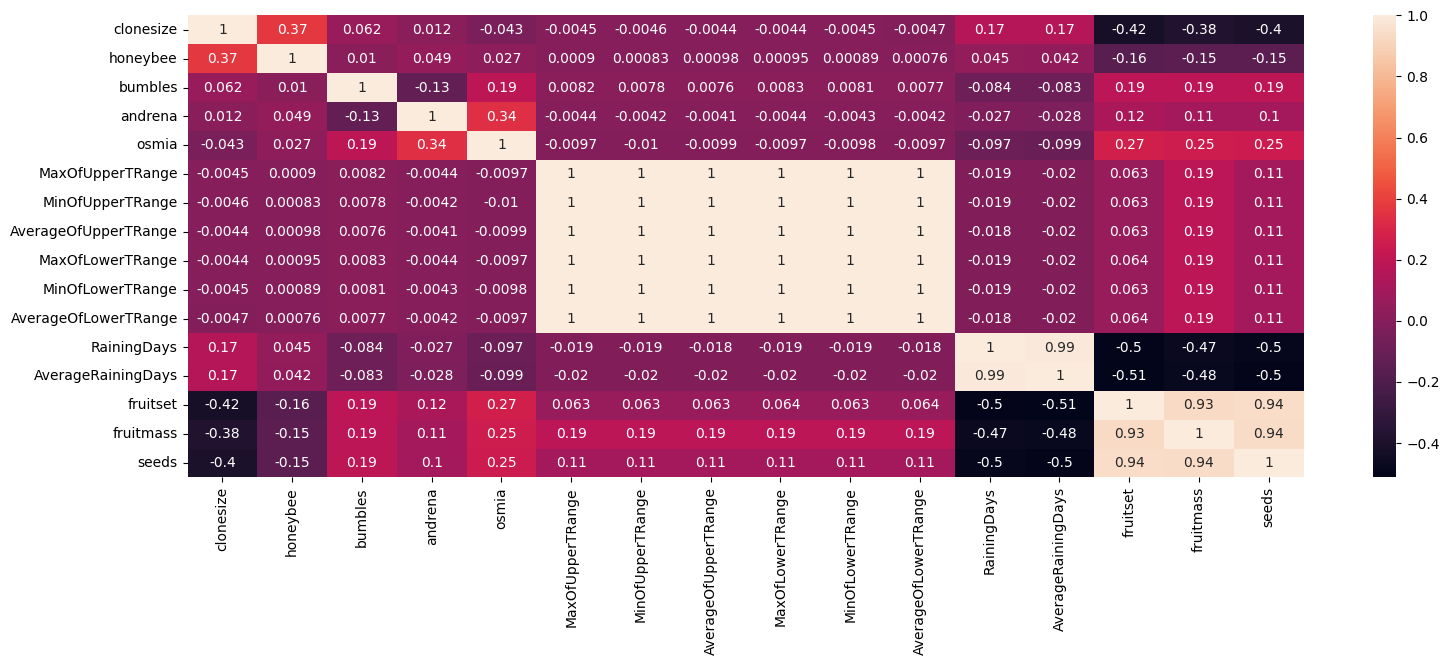

In [32]:
# Correlation Matrix for Testing Data
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(X_test.corr(), annot=True)

<Axes: >

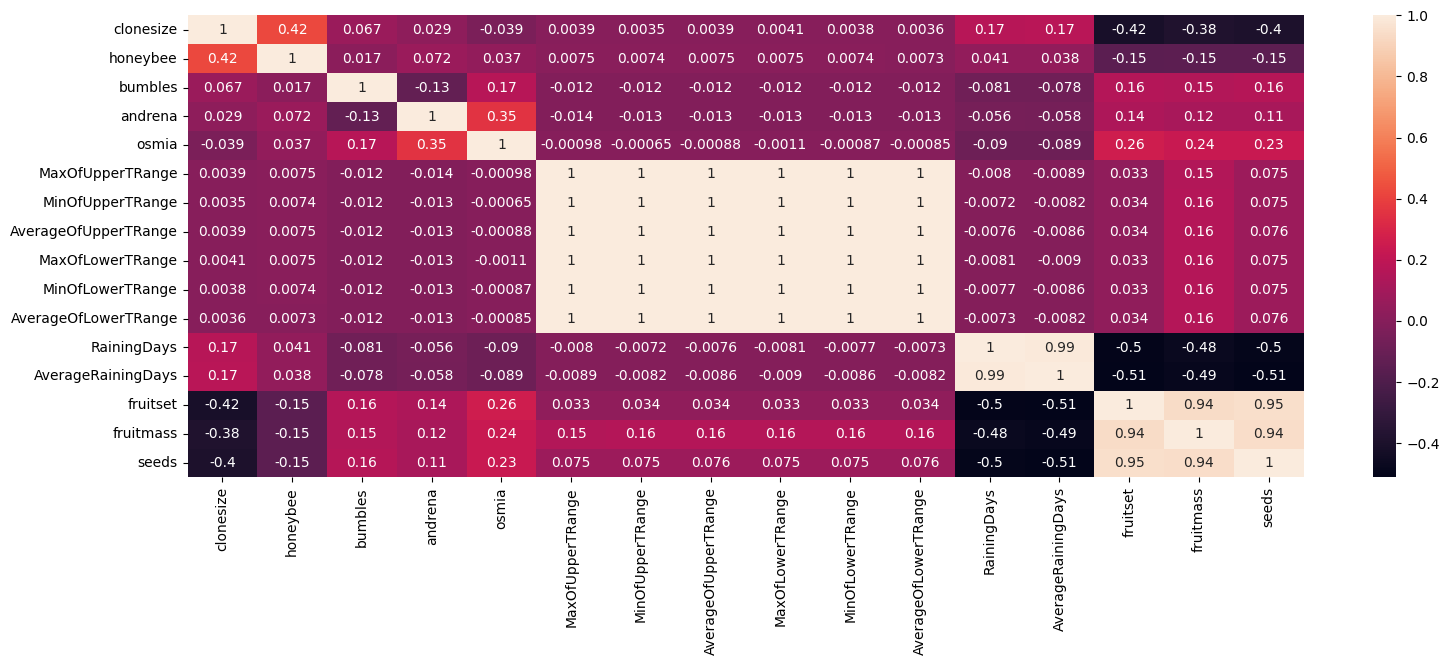

In [33]:
# Correlation Matrix for Training Data
fig, ax = plt.subplots(figsize=(18, 6))
sns.heatmap(X_train.corr(), annot=True)